# Feature Selection : 상관성 & 다중공선성 확인
---

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    return x.rjust(6, "0")

## 1-1. 상관성(샤프지수와 일일변동평균에서 존재)

In [3]:
df = pd.read_csv("./datasets/preprocessed_final.csv", index_col=0)
df["종목코드"] = df["종목코드"].astype("str")
df["종목코드"] = df["종목코드"].map(padding)
df

,종목코드,종목명,NCAV,PEGR,PSR,유동비율,부채비율,일일변동평균,샤프지수,PER,PBR,시가총액
0,000990,DB하이텍,0.028653,4.113681,2.670785,174.09,48.29,0.445142,49.648820,23.36,3.89,2499641.0
1,023150,MH에탄올,-0.301897,-0.000000,1.253321,117.69,69.27,0.081587,1.717932,0.00,1.12,64267.0
2,002360,SH에너지화학,0.361237,-0.000000,1.143522,917.82,29.79,0.166757,10.246872,0.00,1.07,104466.0
3,009160,SIMPAC,0.176695,-0.571031,0.779131,125.85,51.22,0.174309,27.341287,20.64,0.48,211992.0
4,100840,SNT에너지,0.779873,0.073893,0.577712,257.09,40.37,0.131054,21.178235,8.24,0.54,132869.0
...,...,...,...,...,...,...,...,...,...,...,...,...
841,000850,화천기공,0.763649,7.384076,0.567872,341.83,24.95,0.077436,17.755082,10.23,0.26,76230.0
842,016580,환인제약,0.537149,3.277122,1.954171,798.20,11.09,0.105514,11.548340,14.69,1.22,334801.0
843,094280,효성ITX,-0.235806,1.557279,0.485197,63.82,227.69,0.222635,21.623614,22.47,4.85,233476.0
844,205470,휴마시스,0.099311,-0.000000,4.392172,439.90,39.94,0.530306,16.946579,0.00,12.50,231353.0


/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:342: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


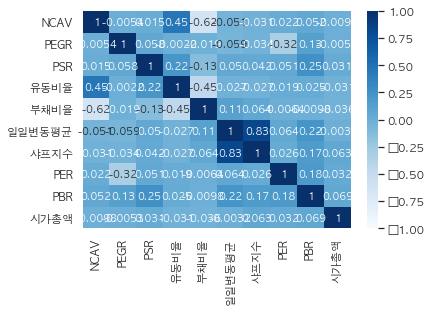

In [4]:
# 1) 독립변수 설정
df_num = df.select_dtypes(exclude='object')

# 2) 상관행렬 시각화
sns.set(font="AppleGothic",rc = {'figure.figsize':(12,12)})  
sns.heatmap(df_num.corr(), annot = True, cmap='Blues', vmin=-1, vmax=1)
plt.show()

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self.fig.tight_layout(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


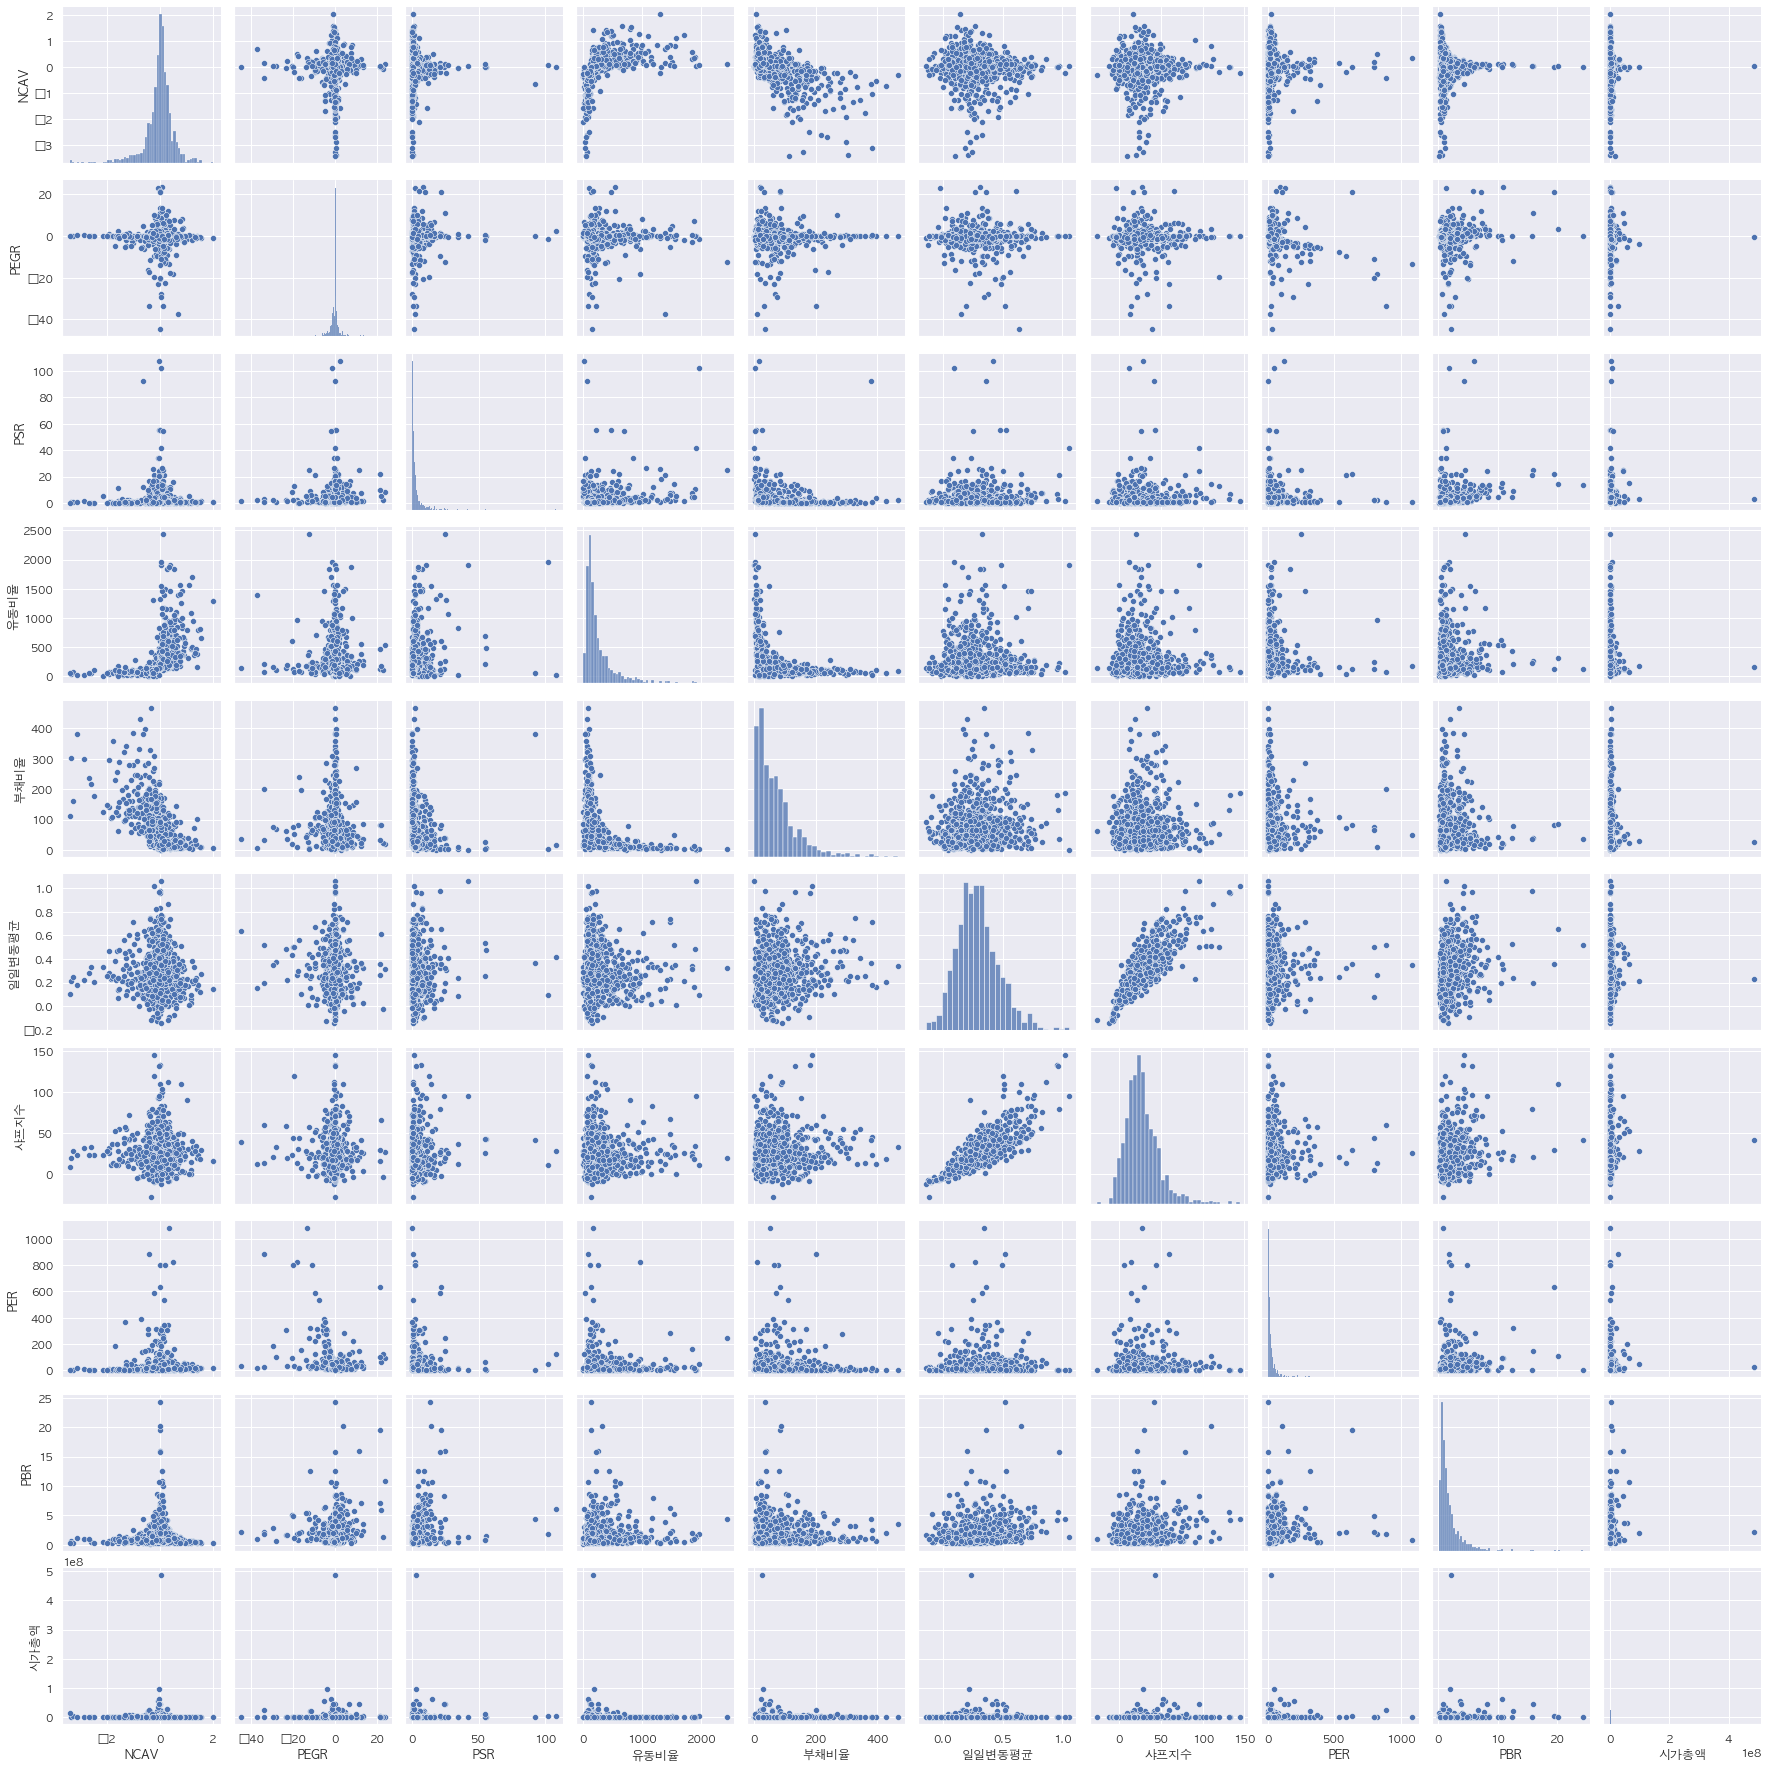

In [5]:
# 4) 변수끼리 산점도를 시각화
sns.pairplot(df_num)
plt.show()

## 1-2. 다중공선성 확인(일일변동평균이 다중공선성이 높음을 확인)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame(
    [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])],
    index=df_num.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
일일변동평균,11.292141
샤프지수,8.820147
부채비율,2.654126
PBR,2.114697
유동비율,1.926318
NCAV,1.734548
PSR,1.375977
PER,1.373927
PEGR,1.196713
시가총액,1.033348


> ### 일일변동평균과 샤프지수에서 상관관계가 존재한다 하더라도, 나중에 차원축소를 하게 된다면 상관관계가 줄어들 수 있기에 제거를 하지 않도록함
> ### 실제로, 일일변동 평균을 제거하여 PCA & clustering를 진행하였을 때 결과가 좋지 x

---
# PCA & Clustering

# 1. PCA

## 1-1. Data

In [4]:
df = pd.read_csv("./datasets/preprocessed_final.csv", index_col=0)
df["종목코드"] = df["종목코드"].astype("str")
df["종목코드"] = df["종목코드"].map(padding)
df

,종목코드,종목명,NCAV,PEGR,PSR,유동비율,부채비율,일일변동평균,샤프지수,PER,PBR,시가총액
0,000990,DB하이텍,0.028653,4.113681,2.670785,174.09,48.29,0.445142,49.648820,23.36,3.89,2499641.0
1,023150,MH에탄올,-0.301897,-0.000000,1.253321,117.69,69.27,0.081587,1.717932,0.00,1.12,64267.0
2,002360,SH에너지화학,0.361237,-0.000000,1.143522,917.82,29.79,0.166757,10.246872,0.00,1.07,104466.0
3,009160,SIMPAC,0.176695,-0.571031,0.779131,125.85,51.22,0.174309,27.341287,20.64,0.48,211992.0
4,100840,SNT에너지,0.779873,0.073893,0.577712,257.09,40.37,0.131054,21.178235,8.24,0.54,132869.0
...,...,...,...,...,...,...,...,...,...,...,...,...
841,000850,화천기공,0.763649,7.384076,0.567872,341.83,24.95,0.077436,17.755082,10.23,0.26,76230.0
842,016580,환인제약,0.537149,3.277122,1.954171,798.20,11.09,0.105514,11.548340,14.69,1.22,334801.0
843,094280,효성ITX,-0.235806,1.557279,0.485197,63.82,227.69,0.222635,21.623614,22.47,4.85,233476.0
844,205470,휴마시스,0.099311,-0.000000,4.392172,439.90,39.94,0.530306,16.946579,0.00,12.50,231353.0


In [5]:
## PCA를 위한 데이터 구분 / 수치형 변수들로만 구성된 data로 PCA 수행
df_obj = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

# column에 PCA를 적용하기 이전에 scaling을 진행 / eigenvalue를 확인
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_ds = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
scaled_ds.head()

,NCAV,PEGR,PSR,유동비율,부채비율,일일변동평균,샤프지수,PER,PBR,시가총액
0,0.096924,0.987483,-0.115637,-0.333705,-0.356493,0.857063,1.083739,-0.140511,0.903997,0.025080
1,-0.483167,0.135456,-0.292114,-0.515496,-0.048657,-1.162791,-1.229959,-0.401798,-0.370938,-0.112188
2,0.680584,0.135456,-0.305784,2.063518,-0.627940,-0.689599,-0.818254,-0.401798,-0.393951,-0.109923
3,0.356727,0.017184,-0.351151,-0.489194,-0.313501,-0.647641,0.006920,-0.170935,-0.665508,-0.103862
4,1.415260,0.150761,-0.376228,-0.066176,-0.472702,-0.887961,-0.290580,-0.309631,-0.637892,-0.108322


In [6]:
df_scaled = pd.concat([df[["종목코드", "종목명"]],scaled_ds], axis=1)
df_scaled

,종목코드,종목명,NCAV,PEGR,PSR,유동비율,부채비율,일일변동평균,샤프지수,PER,PBR,시가총액
0,000990,DB하이텍,0.096924,0.987483,-0.115637,-0.333705,-0.356493,0.857063,1.083739,-0.140511,0.903997,0.025080
1,023150,MH에탄올,-0.483167,0.135456,-0.292114,-0.515496,-0.048657,-1.162791,-1.229959,-0.401798,-0.370938,-0.112188
2,002360,SH에너지화학,0.680584,0.135456,-0.305784,2.063518,-0.627940,-0.689599,-0.818254,-0.401798,-0.393951,-0.109923
3,009160,SIMPAC,0.356727,0.017184,-0.351151,-0.489194,-0.313501,-0.647641,0.006920,-0.170935,-0.665508,-0.103862
4,100840,SNT에너지,1.415260,0.150761,-0.376228,-0.066176,-0.472702,-0.887961,-0.290580,-0.309631,-0.637892,-0.108322
...,...,...,...,...,...,...,...,...,...,...,...,...
841,000850,화천기공,1.386788,1.664849,-0.377453,0.206962,-0.698957,-1.185853,-0.455821,-0.287373,-0.766766,-0.111514
842,016580,환인제약,0.989297,0.814215,-0.204856,1.677954,-0.902322,-1.029855,-0.755430,-0.237487,-0.324912,-0.096940
843,094280,효성ITX,-0.367182,0.458000,-0.387746,-0.689132,2.275813,-0.379152,-0.269081,-0.150466,1.345852,-0.102651
844,205470,휴마시스,0.220924,0.135456,0.098679,0.523065,-0.479011,1.330218,-0.494849,-0.401798,4.866883,-0.102771


## 1-2. 주성분 설명력 확인

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_8255/3091184214.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


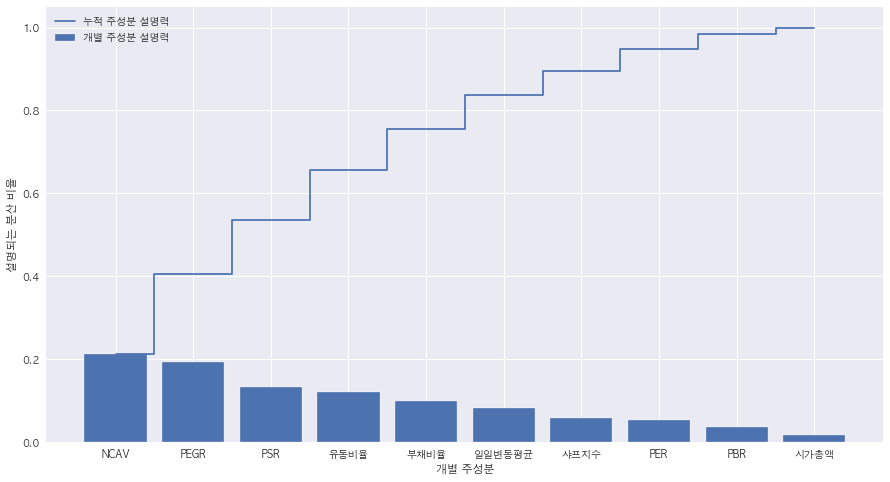

In [69]:
# PCA로 설명되는 분산을 계산 & plot
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams['figure.figsize'] = [15, 8]

cov_mat = np.cov(scaled_ds.T) # 각 열에 대해 공분산 계산
eigen_vals, _ = np.linalg.eig(cov_mat) # 공분산의 고유값, 고유벡터 계산. (PCA에서의 분산 = 고유값)
tot=sum(eigen_vals) 

var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)] # 개별 주성분 설명력(고유값 / 전체 고유값). 공분산의 고유값이 높은 순서대로 계산(%)
cum_var_exp=np.cumsum(var_exp) # 누적 주성분 설명력

plt.bar(scaled_ds.columns, var_exp, label='개별 주성분 설명력')
plt.step(scaled_ds.columns,cum_var_exp, where='mid', label='누적 주성분 설명력')
plt.ylabel('설명되는 분산 비율')
plt.xlabel('개별 주성분')
plt.legend(loc='best')

In [13]:
# 주성분별 설명력 & 누적 설명력
## 6개 이상일 때 누적설명력이 0.8을 넘음
data = {"설명력":list(eigen_vals/tot), "누적설명력": list(cum_var_exp)}
df_pca = pd.DataFrame(data, index=scaled_ds.columns)
df_pca.sort_values(by=["설명력"])
df_pca

,설명력,누적설명력
NCAV,0.211058,0.211058
PEGR,0.193316,0.404374
PSR,0.131347,0.535721
유동비율,0.119815,0.655536
부채비율,0.099576,0.755112
일일변동평균,0.082657,0.837769
샤프지수,0.016518,0.894289
PER,0.035819,0.947663
PBR,0.056520,0.983482
시가총액,0.053373,1.000000


In [9]:
# 분산 80%이상을 설명하는 주성분 갯수( = PCA 차원 수)
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_ds)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.80) + 1
d

6

## 1-3. PCA : 차원축소

In [8]:
# 분산 누적 설명량이 80% 이상 도달하는 6차원으로 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=5, random_state=100)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_ds), columns=(['PC1', 'PC2', 'PC3', 'PC4', 'PC5']))
PCA_ds

,PC1,PC2,PC3,PC4,PC5
0,0.516872,1.324843,-1.027027,-0.026448,0.130861
1,-0.257663,-1.852913,-0.116521,0.285218,0.013938
2,-2.120629,-0.383344,-0.177704,-0.461681,-0.106295
3,-0.313063,-0.696681,0.034869,-0.568150,0.181508
4,-1.315988,-0.660653,-0.086664,-0.726747,0.234847
...,...,...,...,...,...
841,-1.761517,-0.937878,-1.129403,-0.484312,0.256418
842,-2.372281,-0.466153,-0.555015,-0.229212,-0.012281
843,1.639205,-0.731900,-0.454511,1.121086,-0.287934
844,-0.186825,2.405234,-0.885518,2.294603,-0.496585


## 1-4. PCA 주성분들의 상관계수

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:342: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


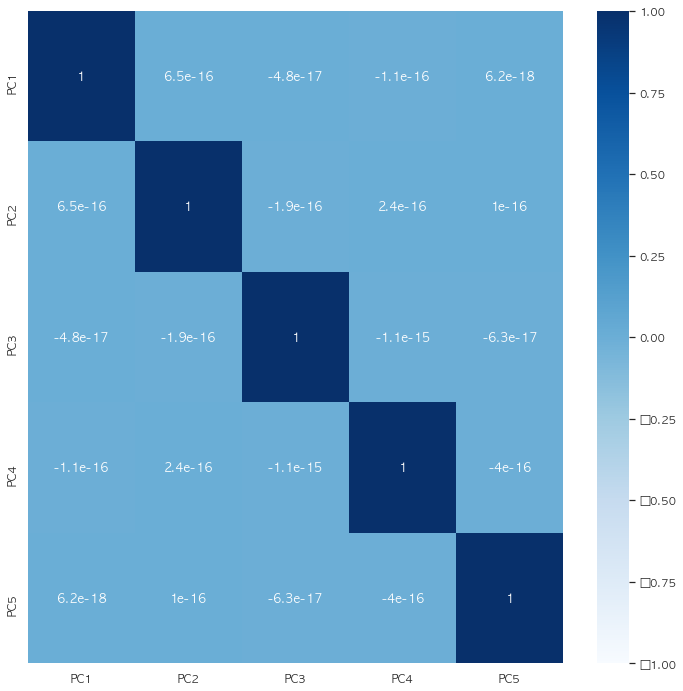

In [11]:
# 상관행렬 시각화
sns.set(font="AppleGothic",rc = {'figure.figsize':(12,12)})  
sns.heatmap(PCA_ds.corr(), annot = True, cmap='Blues', vmin=-1, vmax=1)
plt.show()

## 1-5. PCA 주성분과 변수들의 상관관계

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# loadings.shape
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
                            index=scaled_ds.columns)

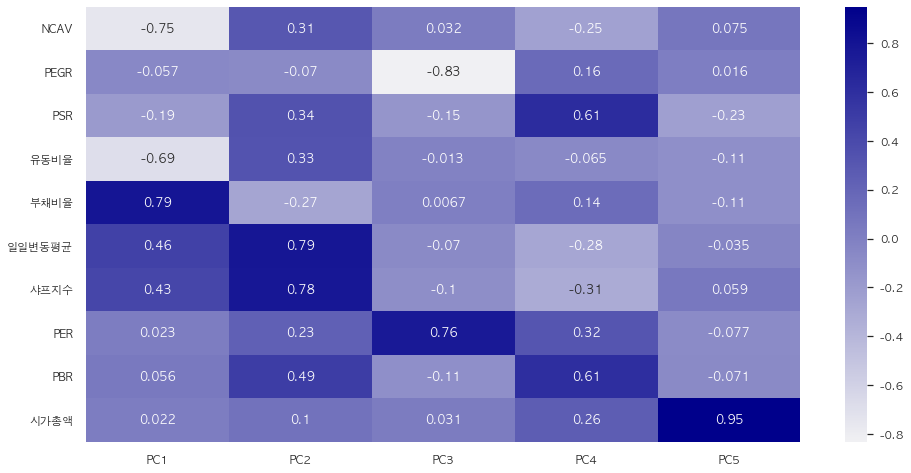

In [ ]:
cmap = sns.light_palette("DarkBlue", as_cmap = True)
sns.set(font="AppleGothic",rc = {'figure.figsize':(16,8)})  
sns.heatmap(loading_matrix, annot = True, cmap = cmap)
plt.show()

[각각의 주성분들을 대표하는 변수, 절댓값 0.5이상]
- PC1 : NCAV, 유동비율, 부채비율
- PC2 : 일일변동평균, 샤프지수
- PC3 : PEGR, PER
- PC4 : PSR, PBR
- PC5 : 시가총액

---
# 2. 클러스터링

## 2-1. 클러스터 수 k 결정

### 2-1-1. Elbow Method
- 파란색 : 각 데이터들의 군집 중심과의 평균 거리
- 초록색 : 학습 시간

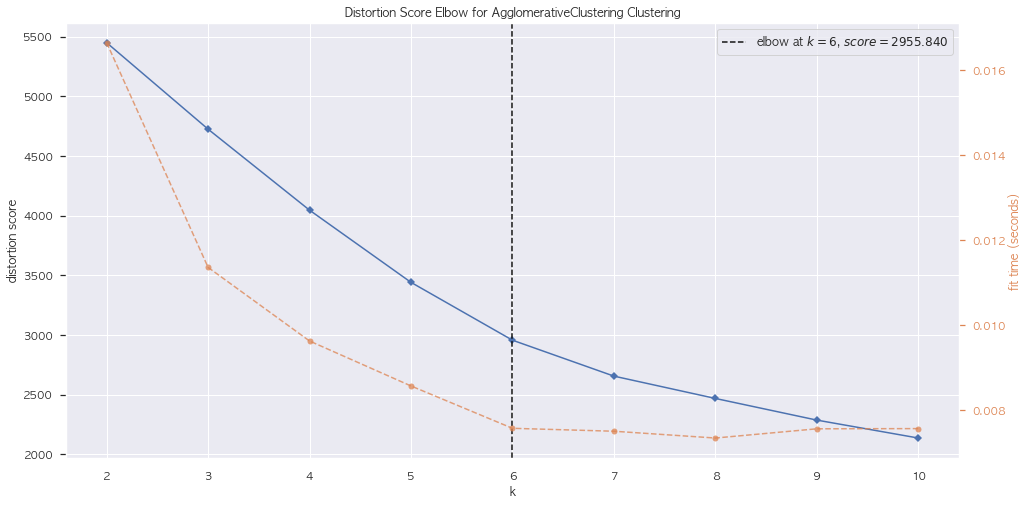

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# distortion score : 각 클러스터 중심으로부터 데이터간의 거리의 제곱합
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

# Elbow_M = KElbowVisualizer(KMeans(random_state = 100), k=10, metric = 'distortion') #Kmeans
Elbow_M = KElbowVisualizer(AgglomerativeClustering(linkage='ward'), k=10, metric = 'distortion') # AgglomerativeClustering
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### 2-1-2. Silhouette

In [381]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.cluster import AgglomerativeClustering
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = AgglomerativeClustering(n_clusters = n_cluster, linkage='ward')
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                            'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

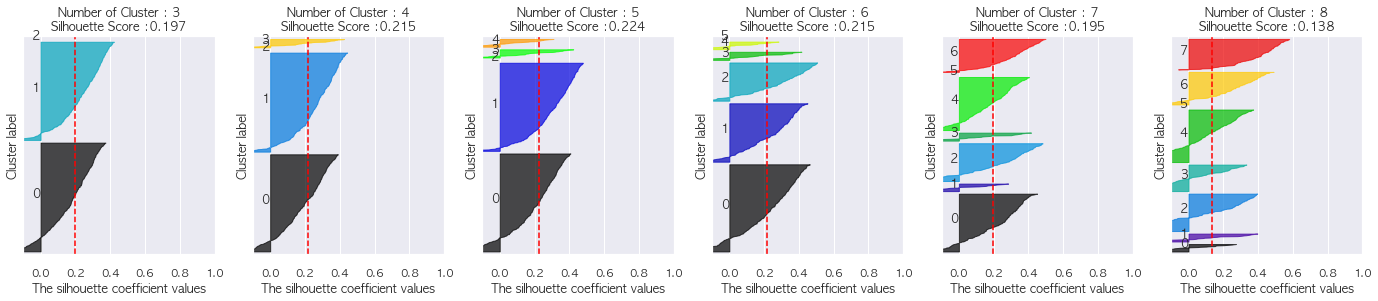

In [382]:
# cluster 개수 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([3,4,5,6,7,8], PCA_ds)

## 2-2. Clustering

[클러스터링 알고리즘] AgglomerativeClustering  

병합 군집 알고리즘은 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나감.  
(linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정함 이 측정은 항상 두 클러스터 사이에서 이뤄짐)


[linkage='ward']  

기본값인 ward 연결(linkage)은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침 그래서 크기가 비교적 비슷한 클러스터가 만들어짐.  
(ward가 대부분의 데이터셋에 알맞음 클러스터에 속한 포인트 수가 많이 다를 땐 (한 클러스터가 다른 것보다 매우 클 때) average나 complete가 더 나을 수 있음)


In [9]:
from sklearn.cluster import AgglomerativeClustering
np.random.seed(42)
AC = AgglomerativeClustering(n_clusters=7, linkage='ward')
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC
df_scaled["Clusters"]= yhat_AC

## 2-3. Plot

### 2-3-1. Cluster별 Count

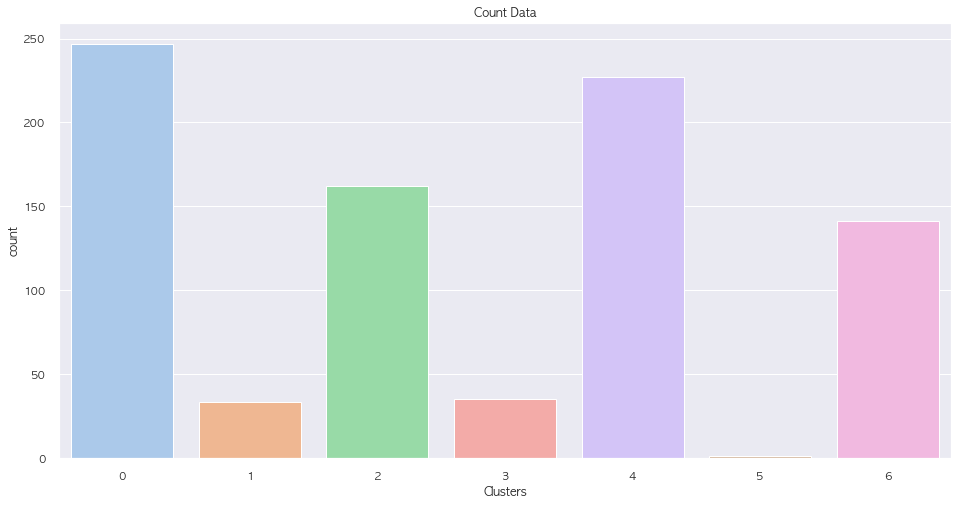

In [420]:
#Plotting countplot of clusters

pl = sns.countplot(x=df["Clusters"], palette="pastel")
pl.set_title("Count Data")
plt.show()

### 2-3-2. 2차원 plot

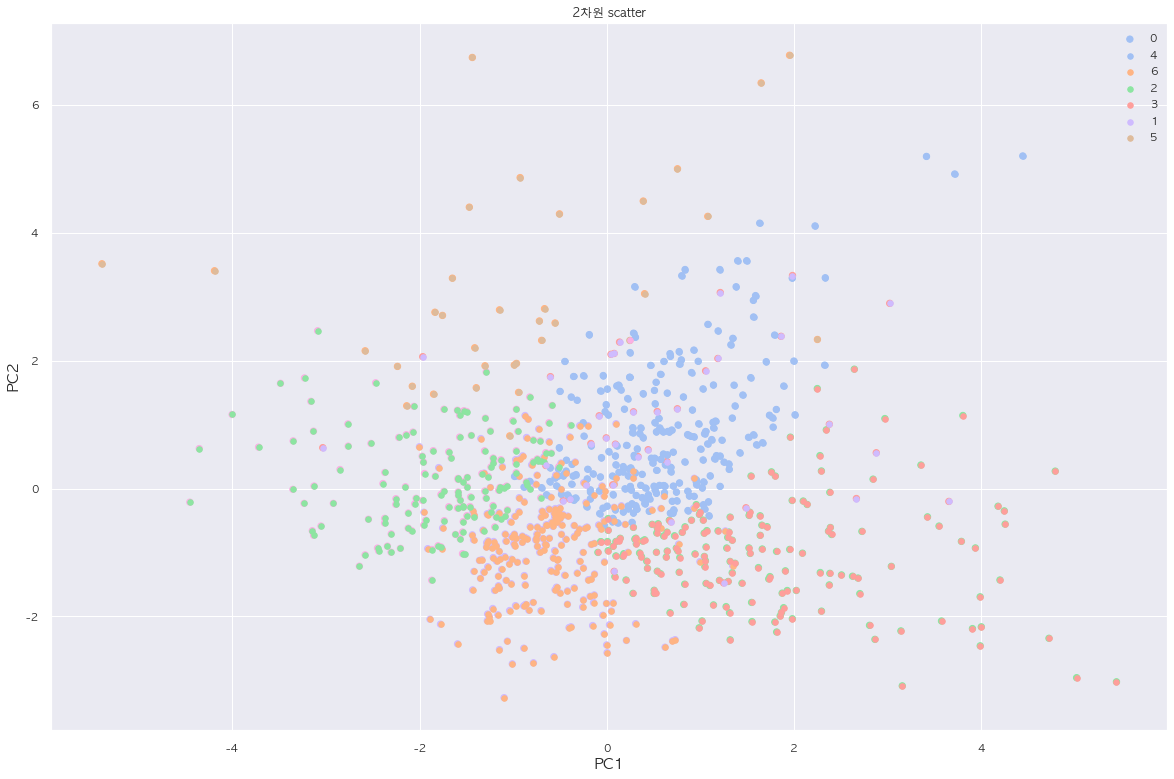

In [249]:
# Plotting the clusters / A 2D Projection Of Data In The Reduced Dimension
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib.font_manager as fm
import seaborn as sns

x_col = "PC1"
y_col = "PC2"

cmap = colors.ListedColormap(["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF", "#DEBB9B", "#FAB0E4"])
labels = PCA_ds["Clusters"].unique().tolist()
colors = ["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF", "#DEBB9B", "#FAB0E4"]

x =PCA_ds[x_col]; y =PCA_ds[y_col]
ig = plt.figure(figsize=(20,13))
ax = plt.subplot(111)
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap)
ax.set_xlabel(x_col, fontsize = 15)
ax.set_ylabel(y_col, fontsize = 15)
ax.set_title("2차원 scatter")

for label, color in zip(labels, colors):
    indicesToKeep = (PCA_ds['Clusters'] == label)
    ax.scatter(PCA_ds.loc[indicesToKeep, x_col]
            , PCA_ds.loc[indicesToKeep, y_col], c = color, s = 30)

plt.legend(labels)
plt.show()

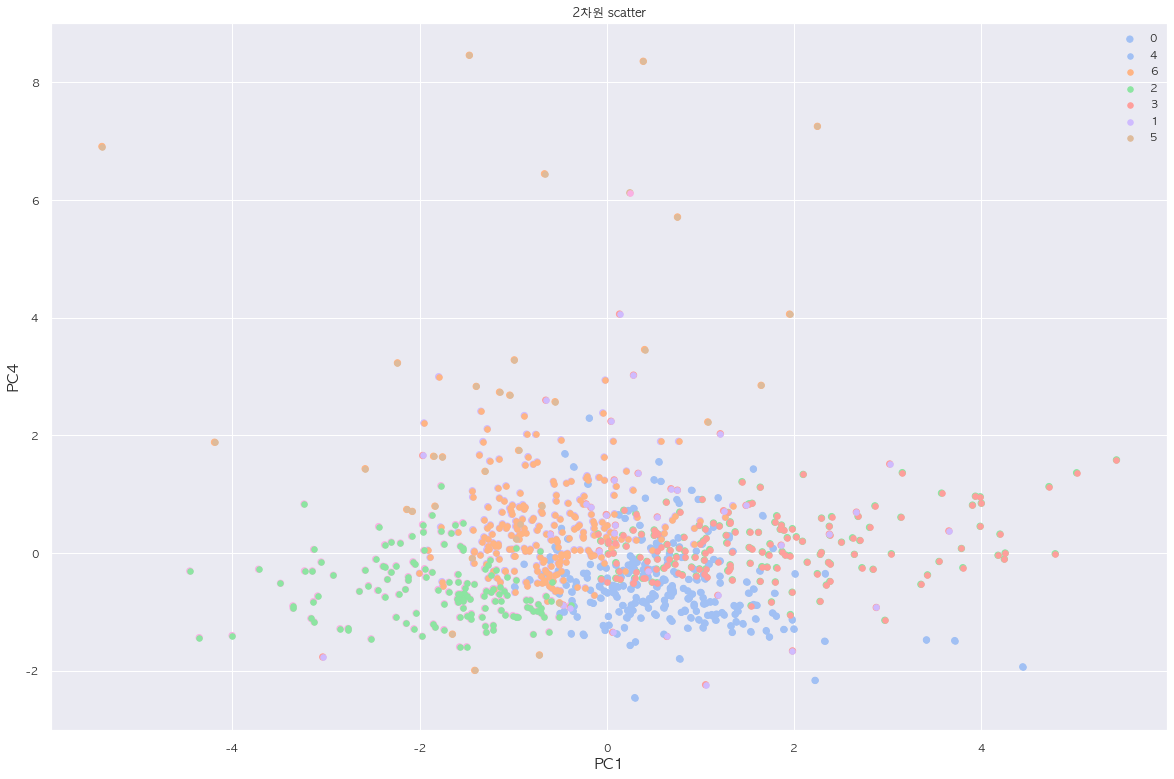

In [268]:
# Plotting the clusters / A 2D Projection Of Data In The Reduced Dimension
from matplotlib import colors
import matplotlib.font_manager as fm
import seaborn as sns

x_col = "PC1"
y_col = "PC4"

cmap = colors.ListedColormap(["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF", "#DEBB9B", "#FAB0E4"])
labels = PCA_ds["Clusters"].unique().tolist()
colors = ["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF", "#DEBB9B", "#FAB0E4"]

x =PCA_ds[x_col]; y =PCA_ds[y_col]
ig = plt.figure(figsize=(20,13))
ax = plt.subplot(111)
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap)
ax.set_xlabel(x_col, fontsize = 15)
ax.set_ylabel(y_col, fontsize = 15)
ax.set_title("2차원 scatter")

for label, color in zip(labels, colors):
    indicesToKeep = (PCA_ds['Clusters'] == label)
    ax.scatter(PCA_ds.loc[indicesToKeep, x_col]
            , PCA_ds.loc[indicesToKeep, y_col], c = color, s = 30)

plt.legend(labels)
plt.show()

### 2-3-3. 3차원 plot

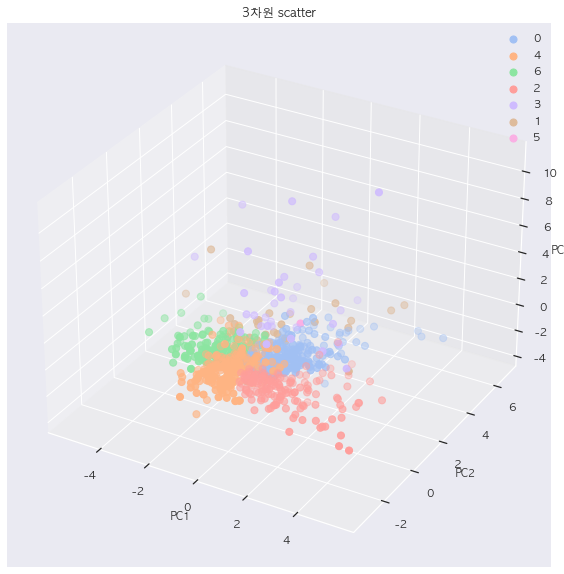

In [259]:
# Plotting the clusters / A 3D Projection Of Data In The Reduced Dimension

x_col = "PC1"
y_col = "PC2"
z_col = "PC3"

labels = PCA_ds["Clusters"].unique().tolist()
colors = ["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF", "#DEBB9B", "#FAB0E4"]

x =PCA_ds[x_col]; y =PCA_ds[y_col]; z =PCA_ds[z_col]
fig = plt.figure(figsize=(50,10))
ax = plt.subplot(111, projection='3d')
ax.set_xlabel(x_col, fontsize = 10)
ax.set_ylabel(y_col, fontsize = 10)
ax.set_zlabel(z_col, fontsize = 10)
ax.set_title("3차원 scatter")

for label, color in zip(labels, colors):
    indicesToKeep = (PCA_ds['Clusters'] == label)
    ax.scatter(PCA_ds.loc[indicesToKeep, x_col]
            , PCA_ds.loc[indicesToKeep, y_col]
            , PCA_ds.loc[indicesToKeep, z_col], c = color, s = 50)

plt.legend(labels)
plt.show()

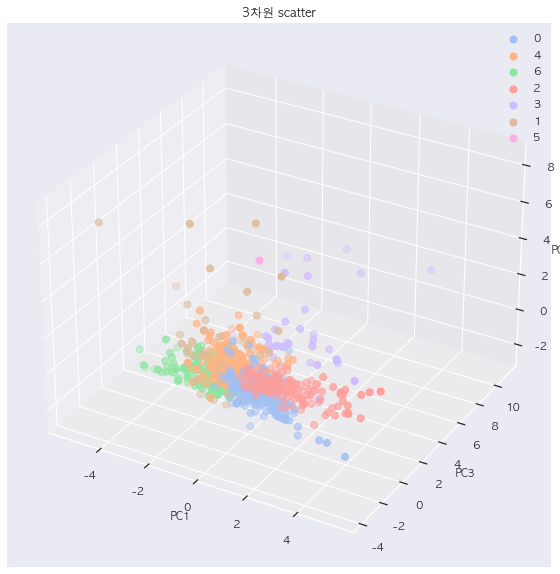

In [279]:
# Plotting the clusters / A 3D Projection Of Data In The Reduced Dimension

x_col = "PC1"
y_col = "PC3"
z_col = "PC4"

labels = PCA_ds["Clusters"].unique().tolist()
colors = ["#A1C0F4", "#FFB483", "#8CE5A1", "#FF9E9B", "#CFBBFF", "#DEBB9B", "#FAB0E4"]

x =PCA_ds[x_col]; y =PCA_ds[y_col]; z =PCA_ds[z_col]
fig = plt.figure(figsize=(50,10))
ax = plt.subplot(111, projection='3d')
ax.set_xlabel(x_col, fontsize = 10)
ax.set_ylabel(y_col, fontsize = 10)
ax.set_zlabel(z_col, fontsize = 10)
ax.set_title("3차원 scatter")

for label, color in zip(labels, colors):
    indicesToKeep = (PCA_ds['Clusters'] == label)
    ax.scatter(PCA_ds.loc[indicesToKeep, x_col]
            , PCA_ds.loc[indicesToKeep, y_col]
            , PCA_ds.loc[indicesToKeep, z_col], c = color, s = 50)

plt.legend(labels)
plt.show()

---
# 3. Cluster 특성 check!

## 3-1. Data

In [10]:
# df_plot = pd.read_csv("./datasets/preprocessed_final.csv", index_col=0)
df_plot = df.copy()
df_plot["종목코드"] = df_plot["종목코드"].astype("str")
df_plot["종목코드"] = df_plot["종목코드"].map(padding)
df_plot

,종목코드,종목명,NCAV,PEGR,PSR,유동비율,부채비율,일일변동평균,샤프지수,PER,PBR,시가총액,Clusters
0,000990,DB하이텍,0.028653,4.113681,2.670785,174.09,48.29,0.445142,49.648820,23.36,3.89,2499641.0,0
1,023150,MH에탄올,-0.301897,-0.000000,1.253321,117.69,69.27,0.081587,1.717932,0.00,1.12,64267.0,4
2,002360,SH에너지화학,0.361237,-0.000000,1.143522,917.82,29.79,0.166757,10.246872,0.00,1.07,104466.0,6
3,009160,SIMPAC,0.176695,-0.571031,0.779131,125.85,51.22,0.174309,27.341287,20.64,0.48,211992.0,4
4,100840,SNT에너지,0.779873,0.073893,0.577712,257.09,40.37,0.131054,21.178235,8.24,0.54,132869.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,000850,화천기공,0.763649,7.384076,0.567872,341.83,24.95,0.077436,17.755082,10.23,0.26,76230.0,4
842,016580,환인제약,0.537149,3.277122,1.954171,798.20,11.09,0.105514,11.548340,14.69,1.22,334801.0,6
843,094280,효성ITX,-0.235806,1.557279,0.485197,63.82,227.69,0.222635,21.623614,22.47,4.85,233476.0,2
844,205470,휴마시스,0.099311,-0.000000,4.392172,439.90,39.94,0.530306,16.946579,0.00,12.50,231353.0,0


## 3-2. 업종 & 시장 분류

In [11]:
market_kospi = pd.read_csv("./datasets/시장분류_코스닥.csv", index_col=0)
market_kosdaq = pd.read_csv("./datasets/시장분류_코스피.csv", index_col=0)
market = pd.concat([market_kospi, market_kosdaq], axis=0)
market.columns = ["종목코드", "시장분류"]
# market

df_plot = pd.merge(df_plot, market, on=["종목코드"], how="left")
# df_plot

In [12]:
type_kospi = pd.read_csv("./datasets/업종분류_코스닥.csv", index_col=0)
type_kosdaq = pd.read_csv("./datasets/업종분류_코스피.csv", index_col=0)
type = pd.concat([type_kospi,type_kosdaq], axis=0)
type.columns = ["종목코드", "KRX업종분류"]

df_plot = pd.merge(df_plot,type, on=["종목코드"], how="left")
df_plot

,종목코드,종목명,NCAV,PEGR,PSR,유동비율,부채비율,일일변동평균,샤프지수,PER,PBR,시가총액,Clusters,시장분류,KRX업종분류
0,000990,DB하이텍,0.028653,4.113681,2.670785,174.09,48.29,0.445142,49.648820,23.36,3.89,2499641.0,0,KOSPI,전기전자
1,023150,MH에탄올,-0.301897,-0.000000,1.253321,117.69,69.27,0.081587,1.717932,0.00,1.12,64267.0,4,KOSPI,음식료품
2,002360,SH에너지화학,0.361237,-0.000000,1.143522,917.82,29.79,0.166757,10.246872,0.00,1.07,104466.0,6,KOSPI,화학
3,009160,SIMPAC,0.176695,-0.571031,0.779131,125.85,51.22,0.174309,27.341287,20.64,0.48,211992.0,4,KOSPI,기계
4,100840,SNT에너지,0.779873,0.073893,0.577712,257.09,40.37,0.131054,21.178235,8.24,0.54,132869.0,6,KOSPI,기계
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,000850,화천기공,0.763649,7.384076,0.567872,341.83,24.95,0.077436,17.755082,10.23,0.26,76230.0,4,KOSPI,기계
842,016580,환인제약,0.537149,3.277122,1.954171,798.20,11.09,0.105514,11.548340,14.69,1.22,334801.0,6,KOSPI,의약품
843,094280,효성ITX,-0.235806,1.557279,0.485197,63.82,227.69,0.222635,21.623614,22.47,4.85,233476.0,2,KOSPI,서비스업
844,205470,휴마시스,0.099311,-0.000000,4.392172,439.90,39.94,0.530306,16.946579,0.00,12.50,231353.0,0,KOSDAQ,제약


In [13]:
wics = pd.read_csv("./datasets/Wics_중분류.csv", index_col=0).reset_index()
df_plot = pd.merge(df_plot,wics, on=["KRX업종분류"], how="left")
df_plot.drop("KRX업종분류", inplace=True, axis=1)
df_plot.columns = ['종목코드', '종목명', 'NCAV', 'PEGR', 'PSR', '유동비율', '부채비율', '일일변동평균', '샤프지수', 'PER', 'PBR', '시가총액', 'Clusters', '시장분류', '업종분류']
df_plot

,종목코드,종목명,NCAV,PEGR,PSR,유동비율,부채비율,일일변동평균,샤프지수,PER,PBR,시가총액,Clusters,시장분류,업종분류
0,000990,DB하이텍,0.028653,4.113681,2.670785,174.09,48.29,0.445142,49.648820,23.36,3.89,2499641.0,0,KOSPI,전자와 전기제품
1,023150,MH에탄올,-0.301897,-0.000000,1.253321,117.69,69.27,0.081587,1.717932,0.00,1.12,64267.0,4,KOSPI,"식품,음료,담배"
2,002360,SH에너지화학,0.361237,-0.000000,1.143522,917.82,29.79,0.166757,10.246872,0.00,1.07,104466.0,6,KOSPI,소재
3,009160,SIMPAC,0.176695,-0.571031,0.779131,125.85,51.22,0.174309,27.341287,20.64,0.48,211992.0,4,KOSPI,자본재
4,100840,SNT에너지,0.779873,0.073893,0.577712,257.09,40.37,0.131054,21.178235,8.24,0.54,132869.0,6,KOSPI,자본재
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,000850,화천기공,0.763649,7.384076,0.567872,341.83,24.95,0.077436,17.755082,10.23,0.26,76230.0,4,KOSPI,자본재
842,016580,환인제약,0.537149,3.277122,1.954171,798.20,11.09,0.105514,11.548340,14.69,1.22,334801.0,6,KOSPI,제약과생물공학
843,094280,효성ITX,-0.235806,1.557279,0.485197,63.82,227.69,0.222635,21.623614,22.47,4.85,233476.0,2,KOSPI,상업서비스와공급품
844,205470,휴마시스,0.099311,-0.000000,4.392172,439.90,39.94,0.530306,16.946579,0.00,12.50,231353.0,0,KOSDAQ,제약과생물공학


In [14]:
df_plot["업종분류"].unique()

array(['전자와 전기제품', '식품,음료,담배', '소재', '자본재', '상업서비스와공급품', '소매(유통)',
       '제약과생물공학', '소프트웨어와서비스', '운송', '건강관리장비와서비스', '미디어와엔터테인먼트', '다각화된금융',
       '전기통신서비스', '내구소비재와의류', '반도체와반도체장비', '기술하드웨어와장비', '유틸리티'],
      dtype=object)

In [15]:
df_plot[df_plot["업종분류"]=="운송"]

,종목코드,종목명,NCAV,PEGR,PSR,유동비율,부채비율,일일변동평균,샤프지수,PER,PBR,시가총액,Clusters,시장분류,업종분류
18,214330,금호에이치티,0.278056,-0.000000,0.318299,173.94,46.97,0.428328,19.106421,0.00,0.92,280577.0,0,KOSPI,운송
24,212560,네오오토,-0.169853,-0.846156,0.572362,106.22,74.64,0.516305,47.139509,26.94,0.85,67252.0,0,KOSDAQ,운송
40,104040,대성파인텍,-0.020896,-2.009669,2.687488,112.52,61.33,0.613633,38.631290,70.64,1.63,86235.0,0,KOSDAQ,운송
54,004140,동방,-1.014180,-0.000000,0.405140,50.12,383.74,0.712294,45.255377,0.00,2.49,268610.0,2,KOSPI,운송
60,084670,동양고속,-0.768296,0.028340,0.828059,18.56,57.00,0.000851,-3.117870,1.97,0.52,69059.0,4,KOSPI,운송
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,143210,핸즈코퍼레이션,-0.287847,-0.449469,0.296589,98.60,96.22,0.086944,5.458257,20.97,0.45,146703.0,4,KOSPI,운송
830,064350,현대로템,-0.031053,-0.000000,0.646042,125.21,215.78,0.259846,21.081706,0.00,2.10,2221046.0,2,KOSPI,운송
831,012330,현대모비스,0.297113,-1.348496,1.209174,255.18,29.68,0.266683,24.393016,12.05,0.86,27679583.0,0,KOSPI,운송
834,011210,현대위아,0.019015,-1.485095,0.375391,212.45,90.98,0.515803,45.091603,37.10,0.68,2096741.0,0,KOSPI,운송


## 3-3. 업종별 Plot

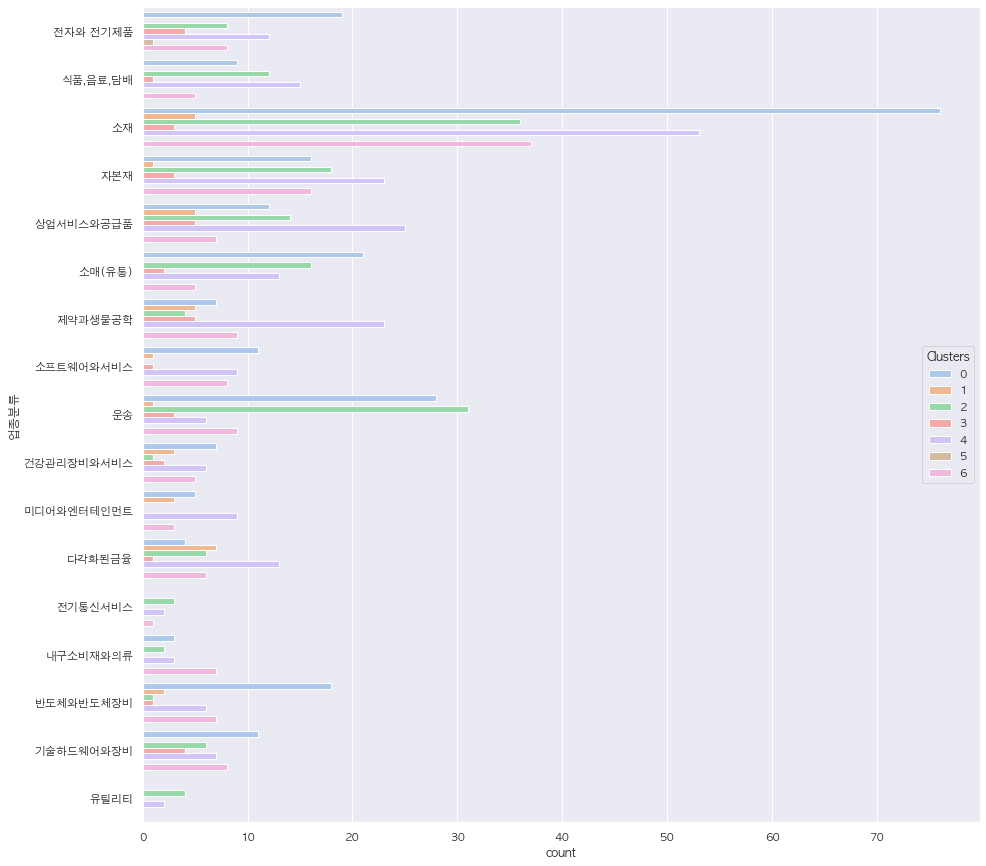

In [25]:
df_plot['Clusters'] = df_plot['Clusters'].astype('object')
# df_plot.drop(['종목코드', '종목명', '시장분류', '업종분류'], axis=1, inplace=True)

sns.set(font="AppleGothic",rc = {'figure.figsize':(15,15)}) # plt.figure(figsize=(15, 15))
sns.countplot(y = '업종분류', hue='Clusters', data=df_plot, palette="pastel")
plt.show()

## 3-4. 변수별 Plot

12it [00:23,  1.95s/it]
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


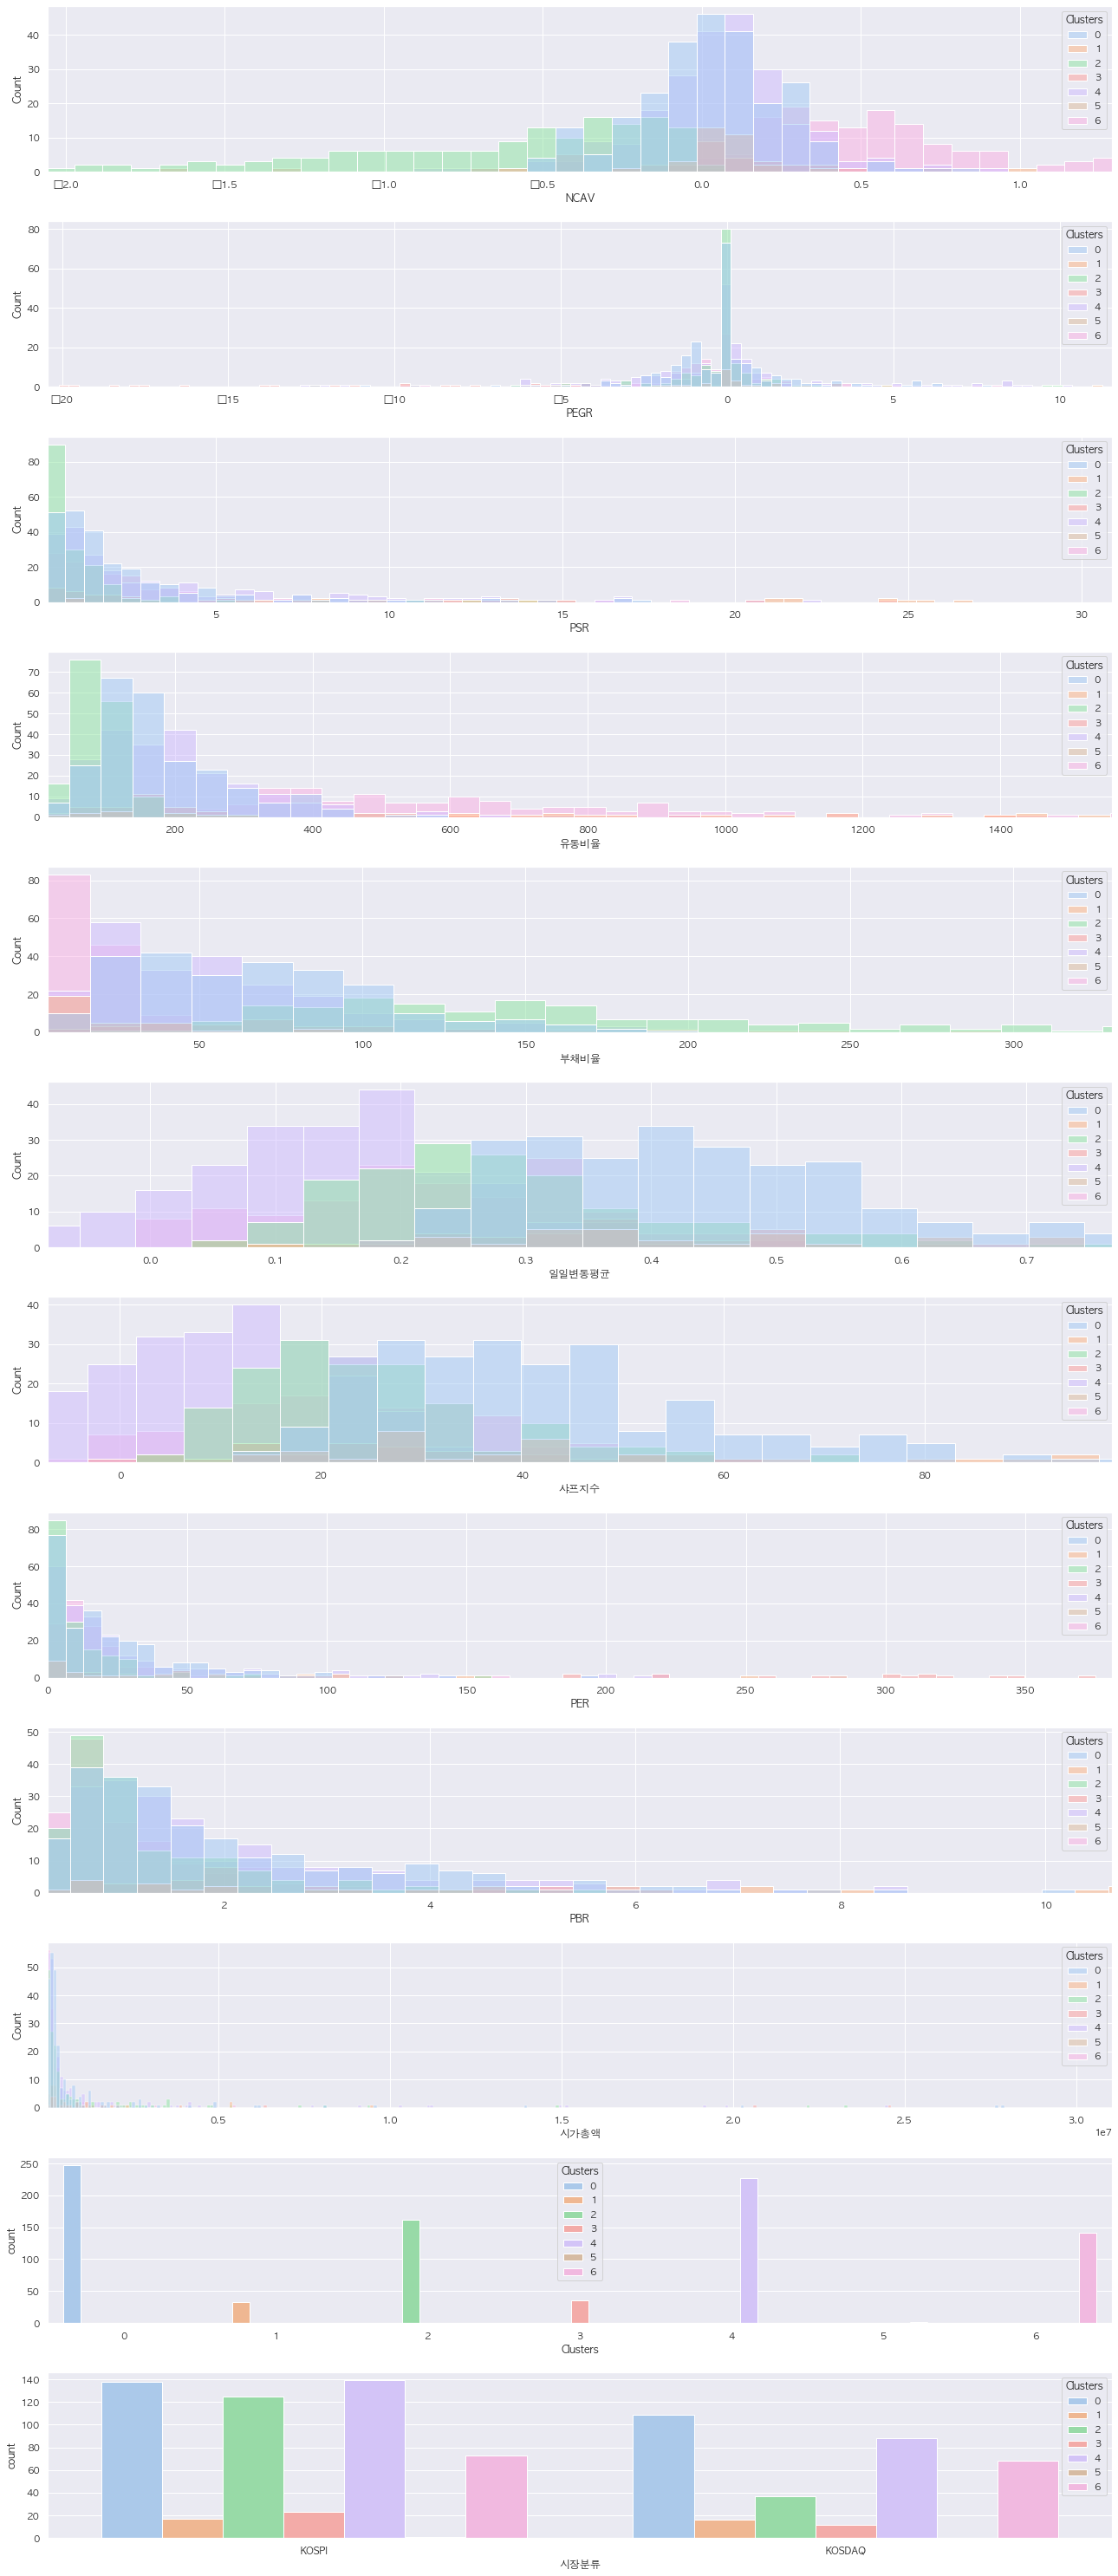

In [29]:
from tqdm import tqdm
# df_plot.drop(['종목코드', '종목명'], axis=1, inplace=True)
df_plot = df_plot[['NCAV', 'PEGR', 'PSR', '유동비율', '부채비율', '일일변동평균', '샤프지수', 'PER', 'PBR', '시가총액', 'Clusters', '시장분류', '업종분류']]


fig = plt.figure(figsize=(22, 72))
for i, col in tqdm(enumerate(df_plot.columns.tolist()[:-1])):
    plt.subplot(16, 1, i+1)
    plt.subplots_adjust(hspace=0.3)
    
    if df_plot[col].dtype == 'float':
        plt.xlim((df[col].quantile(0.01), df[col].quantile(0.99)))
        sns.histplot(x = df_plot[col], hue='Clusters', data=df_plot, palette="pastel")
    else:
        sns.countplot(x = df_plot[col], hue='Clusters', data=df_plot, palette="pastel")

## 3-5. Cluster 선정

Text(0.5, 1.0, '클러스터별 시가총액 중간값')

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


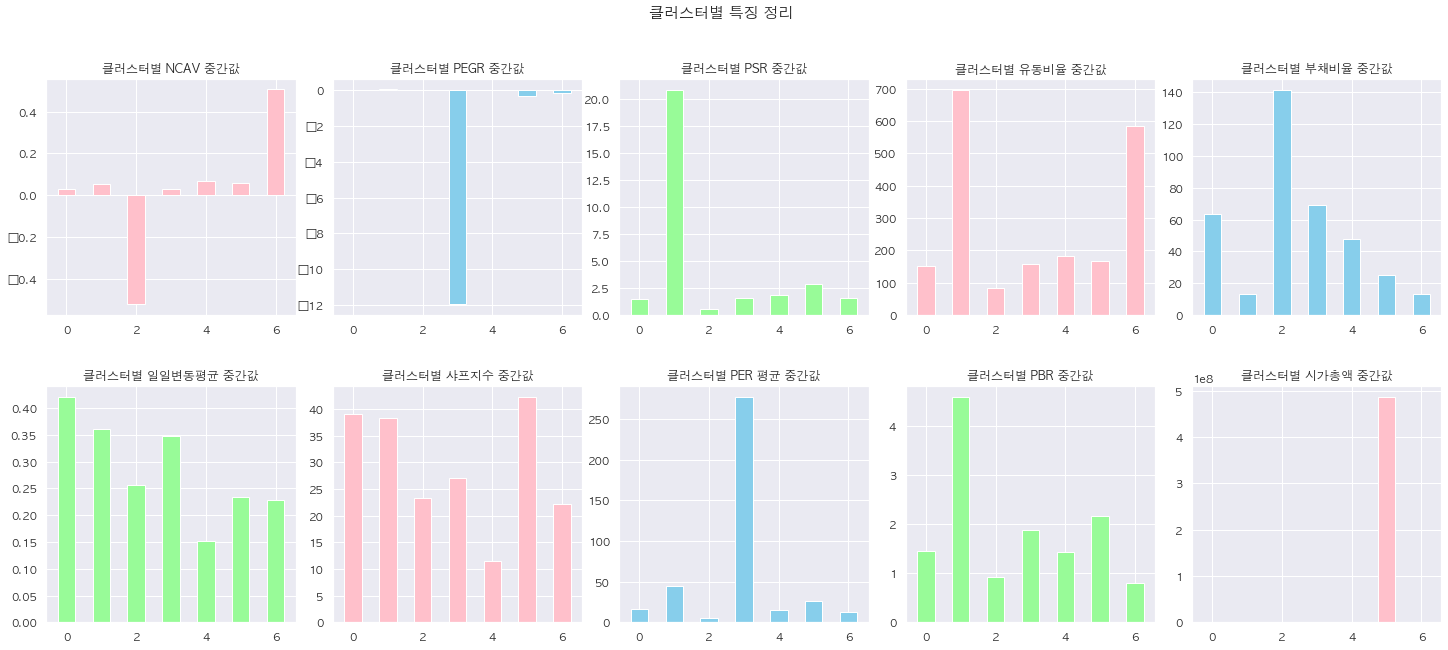

In [27]:
# 클러스터별 재무정보의 차이가 잆는지 확인합니다.

f, axes = plt.subplots(2, 5)
f.set_size_inches((25, 10))
plt.subplots_adjust(wspace = 0.15, hspace = 0.3)

# figure 전체 제목
f.suptitle('클러스터별 특징 정리', fontsize = 15)


# 1.펀더멘탈 지표
## NCAV
axes[0, 0].bar(df.groupby('Clusters')['NCAV'].mean().index, df.groupby('Clusters')['NCAV'].median().values,
    width = 0.5, color = 'pink')
axes[0, 0].set_title('클러스터별 NCAV 중간값', fontsize = 12)

## PEGR
axes[0, 1].bar(df.groupby('Clusters')['PEGR'].mean().index, df.groupby('Clusters')['PEGR'].median().values,
    width = 0.5, color = 'skyblue')
axes[0, 1].set_title('클러스터별 PEGR 중간값', fontsize = 12)

## PSR
axes[0, 2].bar(df.groupby('Clusters')['PSR'].mean().index, df.groupby('Clusters')['PSR'].median().values,
    width = 0.5, color = 'palegreen')
axes[0, 2].set_title('클러스터별 PSR 중간값', fontsize = 12)

## 유동비율
axes[0, 3].bar(df.groupby('Clusters')['유동비율'].mean().index, df.groupby('Clusters')['유동비율'].median().values,
    width = 0.5, color = 'pink')
axes[0, 3].set_title('클러스터별 유동비율 중간값', fontsize = 12)

## 부채비율
axes[0, 4].bar(df.groupby('Clusters')['부채비율'].mean().index, df.groupby('Clusters')['부채비율'].median().values,
    width = 0.5, color = 'skyblue')
axes[0, 4].set_title('클러스터별 부채비율 중간값', fontsize = 12)


# 2. 위험대비성과지표
## 일일변동평균
axes[1, 0].bar(df.groupby('Clusters')['일일변동평균'].mean().index, df.groupby('Clusters')['일일변동평균'].median().values,
    width = 0.5, color = 'palegreen')
axes[1, 0].set_title('클러스터별 일일변동평균 중간값', fontsize = 12)

## 샤프지수
axes[1, 1].bar(df.groupby('Clusters')['샤프지수'].mean().index, df.groupby('Clusters')['샤프지수'].median().values,
    width = 0.5, color = 'pink')
axes[1, 1].set_title('클러스터별 샤프지수 중간값', fontsize = 12)


# 3. 팩터지표
## PER
axes[1, 2].bar(df.groupby('Clusters')['PER'].mean().index, df.groupby('Clusters')['PER'].median().values,
    width = 0.5, color = 'skyblue')
axes[1, 2].set_title('클러스터별 PER 평균 중간값', fontsize = 12)

## PBR
axes[1, 3].bar(df.groupby('Clusters')['PBR'].mean().index, df.groupby('Clusters')['PBR'].median().values,
    width = 0.5, color = 'palegreen')
axes[1, 3].set_title('클러스터별 PBR 중간값', fontsize = 12)

# 시가총액
axes[1, 4].bar(df.groupby('Clusters')['시가총액'].mean().index, df.groupby('Clusters')['시가총액'].median().values,
    width = 0.5, color = 'pink')
axes[1, 4].set_title('클러스터별 시가총액 중간값', fontsize = 12)


In [83]:
# 제외 2(NCAV), 3(PER), 5(count작음)

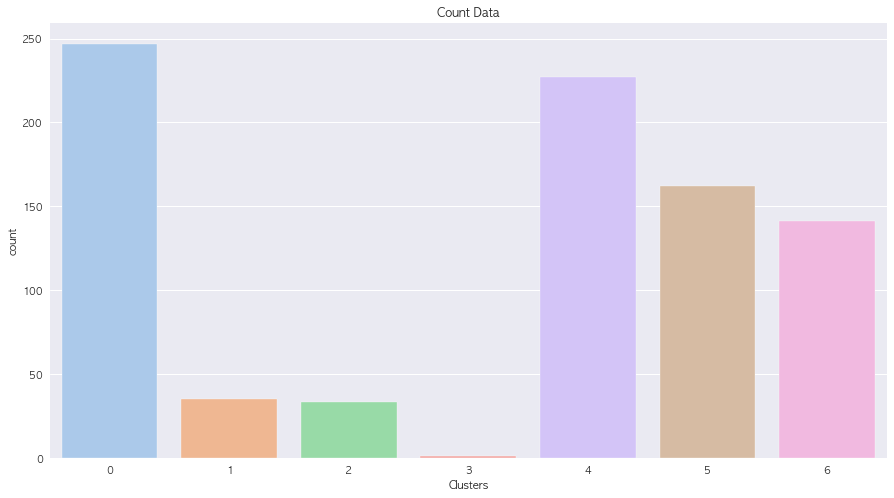

In [84]:
#Plotting countplot of clusters

pl = sns.countplot(x=df["Clusters"], palette="pastel")
pl.set_title("Count Data")
plt.show()

---
# 4. 비중 결정(Xpress Workbench에서 작업)
- 작업에 사용할 csv 만들기

In [47]:
df_xpress = df_scaled.copy()
df_xpress = df_xpress[['종목코드', '종목명', 'NCAV', 'PEGR', 'PSR', '유동비율', '부채비율', '일일변동평균', '샤프지수', 'PER', 'PBR', '시가총액']]
df_xpress.head()

,종목코드,종목명,NCAV,PEGR,PSR,유동비율,부채비율,일일변동평균,샤프지수,PER,PBR,시가총액
0,000990,DB하이텍,0.096924,1.012675,-8.647788,-0.333705,-2.805106,0.857063,1.083739,-7.116884,1.106198,0.025080
1,023150,MH에탄올,-0.483167,7.382475,-3.423326,-0.515496,-20.552136,-1.162791,-1.229959,-2.488815,-2.695868,-0.112188
2,002360,SH에너지화학,0.680584,7.382475,-3.270286,2.063518,-1.592508,-0.689599,-0.818254,-2.488815,-2.538385,-0.109923
3,009160,SIMPAC,0.356727,58.194834,-2.847777,-0.489194,-3.189779,-0.647641,0.006920,-5.850186,-1.502612,-0.103862
4,100840,SNT에너지,1.415260,6.633029,-2.657962,-0.066176,-2.115500,-0.887961,-0.290580,-3.229646,-1.567663,-0.108322


- 높으면 좋은 것 : NCAV, 유동비율 / 일일변동평균, 샤프지수 평균 / 시가총액
- 낮으면 좋은 것 : PEGR, PSR, 부채비율 / PER, PBR

In [48]:
# 낮으면 좋은 변수 역수화
def reciprocal(x):
    return 1/x

df_xpress["PEGR"] = df_xpress["PEGR"].map(reciprocal)
df_xpress["PSR"] = df_xpress["PSR"].map(reciprocal)
df_xpress["부채비율"] = df_xpress["부채비율"].map(reciprocal)
df_xpress["PER"] = df_xpress["PER"].map(reciprocal)
df_xpress["PBR"] = df_xpress["PBR"].map(reciprocal)

In [49]:
# 
df_xpress_obj = df_xpress.select_dtypes(include='object')
df_xpress_num = df_xpress.select_dtypes(exclude='object')

# 낮으면 좋은 변수를 역수 시키고 다시 scaling 하여 모든 변수가 높을수록 좋은 의미가 될 수 있도록 함
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_xpress_num = pd.DataFrame(scaler.fit_transform(df_xpress_num), columns=df_xpress_num.columns)
df_xpress = pd.concat([df_xpress_obj, df_xpress_num], axis=1)
df_xpress.head()

,종목코드,종목명,NCAV,PEGR,PSR,유동비율,부채비율,일일변동평균,샤프지수,PER,PBR,시가총액
0,000990,DB하이텍,0.096924,0.987483,-0.115637,-0.333705,-0.356493,0.857063,1.083739,-0.140511,0.903997,0.025080
1,023150,MH에탄올,-0.483167,0.135456,-0.292114,-0.515496,-0.048657,-1.162791,-1.229959,-0.401798,-0.370938,-0.112188
2,002360,SH에너지화학,0.680584,0.135456,-0.305784,2.063518,-0.627940,-0.689599,-0.818254,-0.401798,-0.393951,-0.109923
3,009160,SIMPAC,0.356727,0.017184,-0.351151,-0.489194,-0.313501,-0.647641,0.006920,-0.170935,-0.665508,-0.103862
4,100840,SNT에너지,1.415260,0.150761,-0.376228,-0.066176,-0.472702,-0.887961,-0.290580,-0.309631,-0.637892,-0.108322


[리스트 3개 필요함]
1. 각 종목코드가 10번씩 반복되는 리스트(8460개)
2. 각 10개의 변수가 순서대로 846번 반복되는 리스트(8460개)
3. 각 행의 변수들이 순서대로 저장되는 리스트(8460개)

In [50]:
length = len(df_xpress)
print(length)

n_columns = len(list(df_xpress.columns))-2 # 종목코드, 종목명 제외
n_columns

846


10

In [51]:
# list1
list1 = list()
for i in df_scaled["종목코드"]:
    for _ in range(n_columns):
        list1.append(i)
# list1
len(list1)

8460

In [52]:
# list2
# columns = ['NCAV','PEGR','PSR','유동비율','부채비율','일일변동평균','샤프지수','PER','PBR','시가총액']
columns = [1,2,3,4,5,6,7,8,9,10]

list2 = list()
for _ in range(length):
    for i in columns:
        list2.append(i)
# list2
len(list2)

8460

In [53]:
# list3
list3 = list()
for i in range(length):
    for j in range(2, n_columns+2):
        list3.append(df_xpress.iloc[i,j])
# list3
len(list3)

8460

In [56]:
df_xpress_csv = pd.DataFrame({'종목코드': list1,
                        'INFO': list2,
                        'VALUE': list3})
df_xpress_csv = df_xpress_csv.head(10*10) # 위에서 10개 기업
# df_xpress_csv.to_csv("./datasets/UBION_Project1_info.csv")
# df_xpress_csv.to_csv("/Users/kyle/Models/data/UBION_Project1_info.csv")
df_xpress_csv

,종목코드,INFO,VALUE
0,000990,1,0.096924
1,000990,2,0.987483
2,000990,3,-0.115637
3,000990,4,-0.333705
4,000990,5,-0.356493
...,...,...,...
95,000050,6,-0.103446
96,000050,7,-0.429140
97,000050,8,-0.311197
98,000050,9,-0.660905
